In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv('data/50_Startups.csv')

In [3]:
data.shape

(50, 5)

In [4]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# in above output, we can clearly see that there are five variables, in which four variables are continuous and one is categorical variable. 

In [7]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
# encoding dummy variables
# As we have one categorical variable (State), which cannot be directly applied to the model, so we will encode it. To encode the categorical variable into numbers, we will use the LabelEncoder class. But it is not sufficient because it still has some relational order, which may create a wrong model. So in order to remove this problem, we will use OneHotEncoder, which will create the dummy variables. 

In [9]:
# categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# One-Hot Encoding
one_hot = pd.get_dummies(data['State'])
# Drop column as it is now encoded
data = data.drop('State', axis=1)
# Join the encoded data
data = data.join(one_hot)

In [10]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
# As we can see in the above output, the state column has been converted into dummy variables (0 and 1). Here each dummy variable column is corresponding to the one State. We can check by comparing it with the original dataset. The first column corresponds to the California State, the second column corresponds to the Florida State, and the third column corresponds to the New York State. 

In [12]:
# extracting dependent and independent variable
X = data[['R&D Spend', 'Administration', 'Marketing Spend','California', 'Florida', 'New York']]
y = data[['Profit']]

In [13]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)


In [14]:
# training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [[ 7.73467193e-01  3.28845975e-02  3.66100259e-02  8.66383692e+01
  -8.72645791e+02  7.86007422e+02]]
Intercept:  [42467.52924855]


In [16]:
# predicting the test result
y_pred = model.predict(X_test)

In [17]:
print('Train Score: ', model.score(X_train, y_train))  
print('Test Score: ', model.score(X_test, y_test))  

Train Score:  0.9501847627493607
Test Score:  0.9347068473282424


In [18]:
# The above score tells that our model is 95% accurate with the training dataset and 93% accurate with the test dataset.

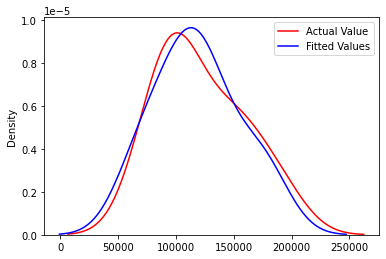

In [19]:
# actual vs predicted

ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value');
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1);
plt.legend()

In [20]:
# Evaluation Metrics
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  7514.293659640607
Mean Squared Error:  83502864.03257748
Root Mean Squared Error:  9137.990152794951
R Squared: 0.9347068473282424


In [22]:
model.predict([['165349.20','136897.80','471784.10','0','0','1']])

array([[192919.57537462]])